In [71]:
import numpy as np
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_excel('DATA RUMAH.xlsx').iloc[:,2:]
df.tail()

,HARGA,LB,LT,KT,KM,GRS
1005,9000000000,450,550,10,10,3
1006,4000000000,160,140,4,3,2
1007,4000000000,139,230,4,4,1
1008,19000000000,360,606,7,4,0
1009,10500000000,420,430,7,4,2


Data description
- HARGA : Price of the house
- LB : Building area
- LT : Surface Area
- KT : Bedrooms
- KM : Bathrooms
- GRS : How many cars can be stored in the garage

## we can use df.describe() to give us important information about mean, median, and quartile in the data

In [74]:
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


# Continuous Quantitative Data Distribution 

- Harga
- LB
- LT

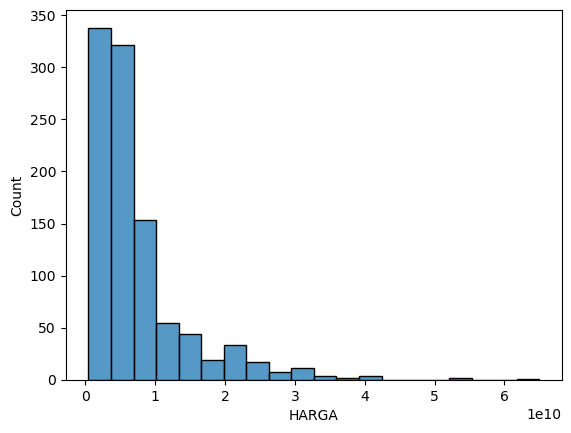

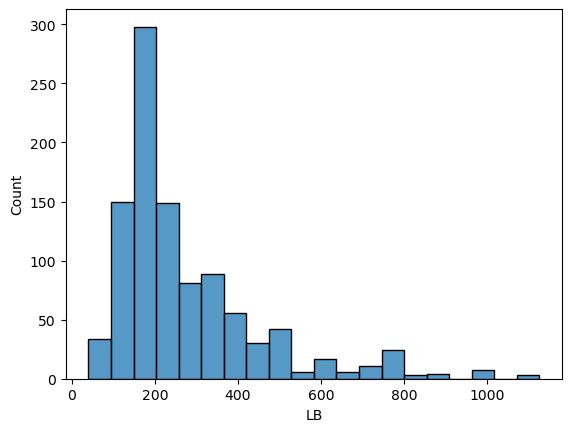

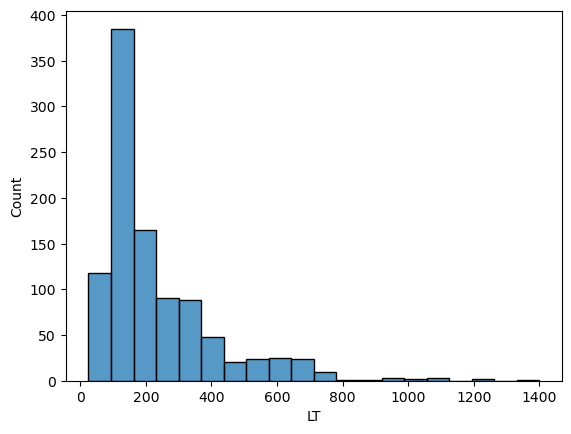

In [75]:
for i, col in enumerate(['HARGA', 'LB', 'LT']):
    plt.figure(i)
    sns.histplot(df[col],bins=20)

The price of the house skewed to the right. Most of the houses in south Jakarta are below 10 Billion Rupiah with Area and Building surface mostly below 200m$^2$.

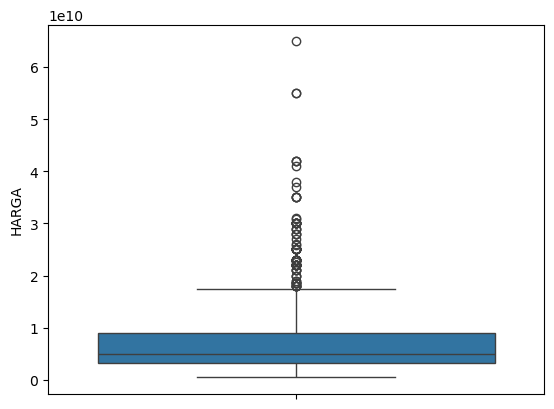

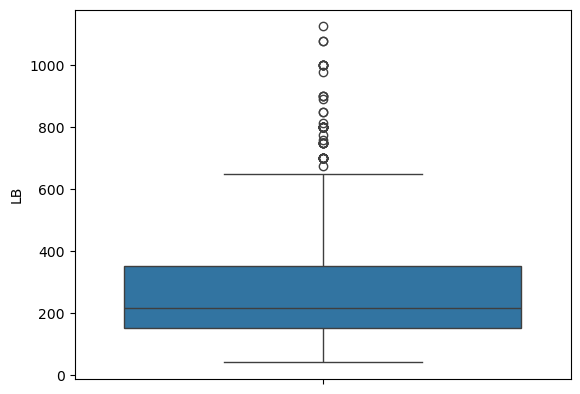

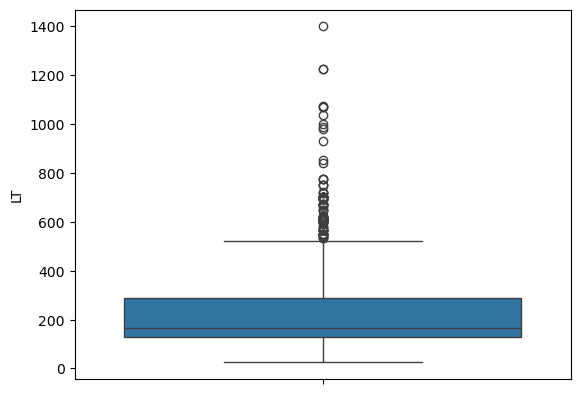

In [76]:
for i, col in enumerate(['HARGA', 'LB', 'LT']):
    plt.figure(i)
    sns.boxplot(df[col])

There are few outliers in the data, we can do normalization or standardization or remove the data completely.

# Discrete Quantitative Data

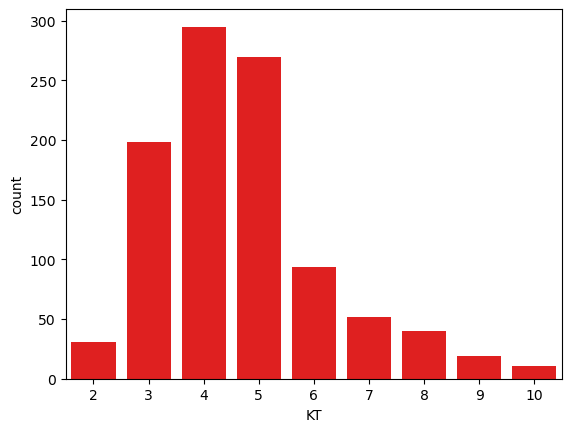

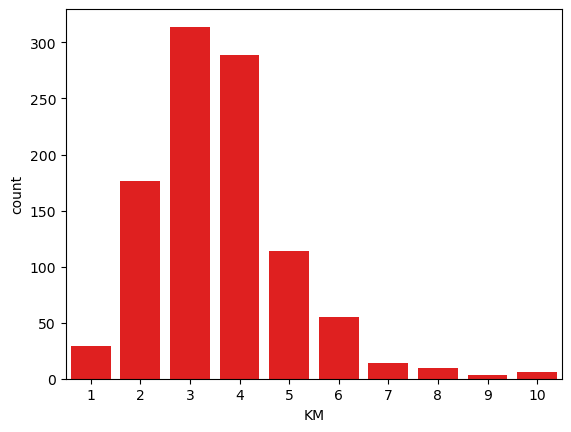

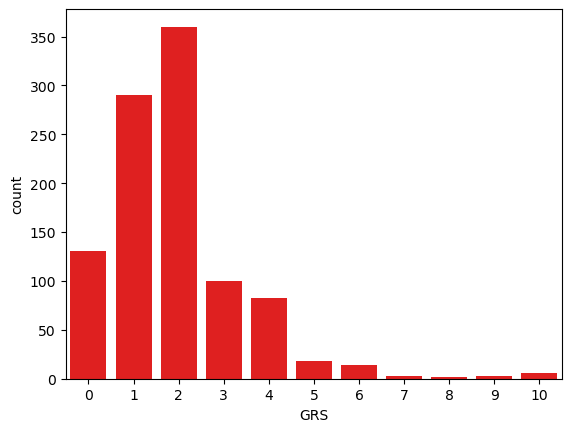

In [77]:
for i, col in enumerate(['KT', 'KM', 'GRS']):
    plt.figure(i)
    sns.barplot(df[col].value_counts(),color="red")

Most Houses has 4 bedrooms, 3 bathrooms and 2 car-garage

# Correlation matrix

<Axes: >

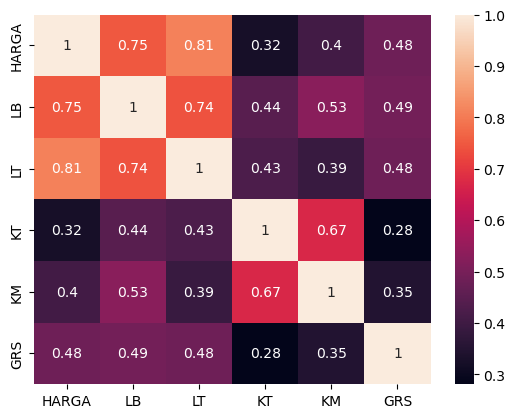

In [78]:
sns.heatmap(df.corr(),annot=True)

as we can see from the heatmap, LT and LB correlates with Price meanwhile the 3 other variables does not really have any significant correlation.

# Grouping Harga

In [97]:
cont_q = ["HARGA",'LB','LT']

In [100]:
df.HARGA.describe().astype(float)

count    1.010000e+03
mean     7.628987e+09
std      7.340946e+09
min      4.300000e+08
25%      3.262500e+09
50%      5.000000e+09
75%      9.000000e+09
max      6.500000e+10
Name: HARGA, dtype: float64

In [101]:
df['kategori'] = pd.cut(df['HARGA'], bins=[4.300000e+08-1,3.262500e+09, 5.000000e+09
, 7.628987e+09, 9.000000e+09,6.500000e+10],
                        labels=['430jt-3.625M',"3.625M-5M",'5M-7.628M','7.629M-9M','9M-65M'])


In [102]:
mean_group = df.groupby('kategori').mean()
mean_group

,HARGA,LB,LT,KT,KM,GRS
kategori,,,,,,
430jt-3.625M,2.464132e+09,142.826087,114.079051,3.667984,2.557312,1.043478
3.625M-5M,4.035978e+09,202.828996,148.427509,4.490706,3.576208,1.650558
5.001M-7.628M,6.348265e+09,272.935135,213.545946,5.010811,3.783784,2.021622
7.629M-9M,8.491493e+09,314.578125,274.312500,5.140625,4.187500,2.140625
9M-65M,1.790079e+10,493.652720,476.803347,5.535565,4.464435,3.016736


<Figure size 640x480 with 0 Axes>

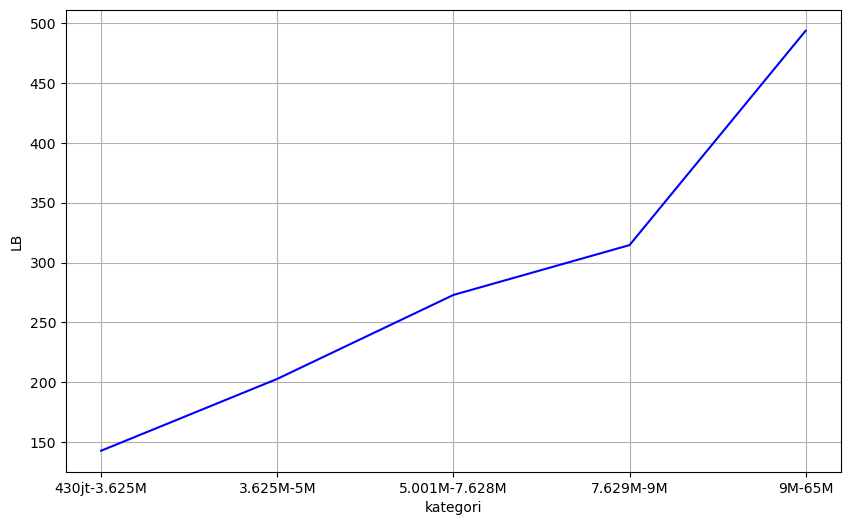

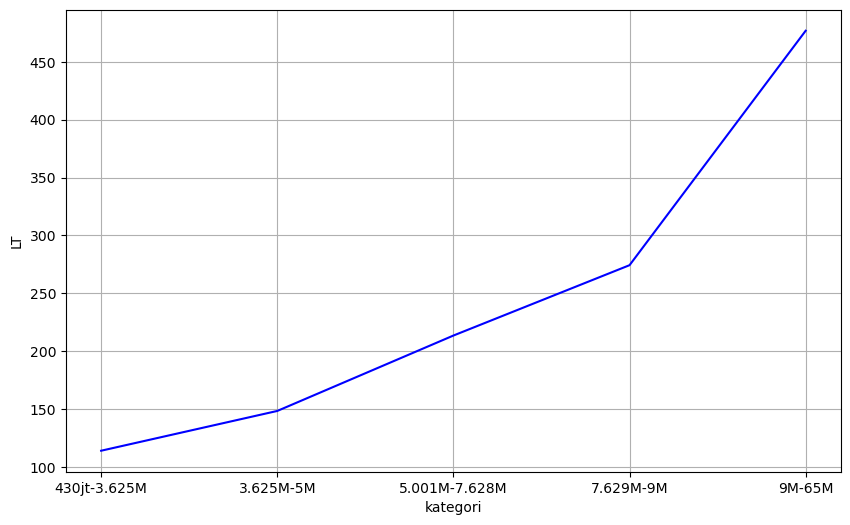

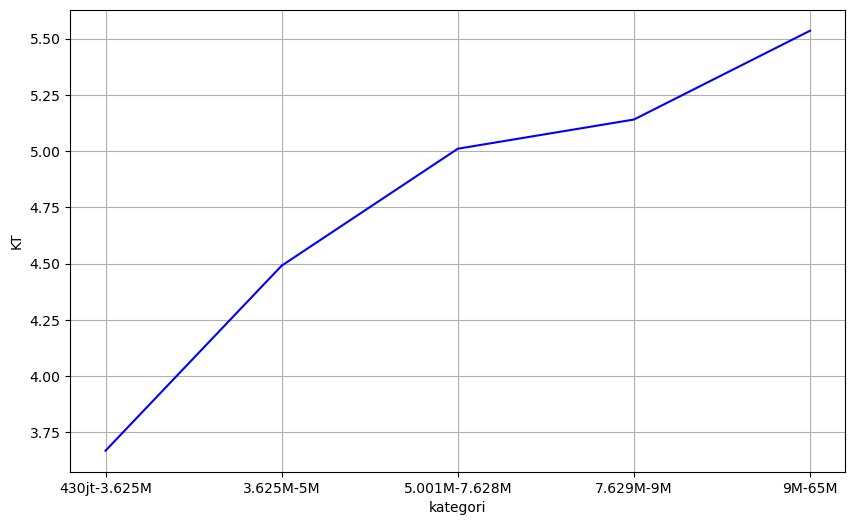

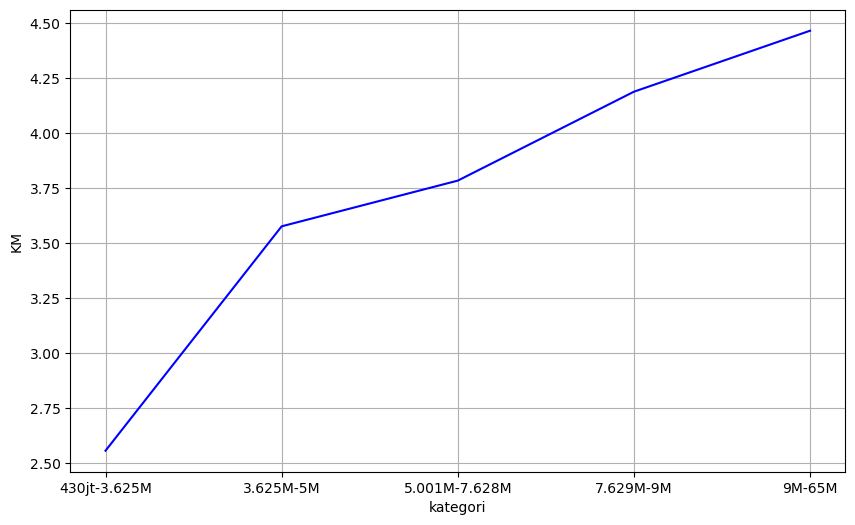

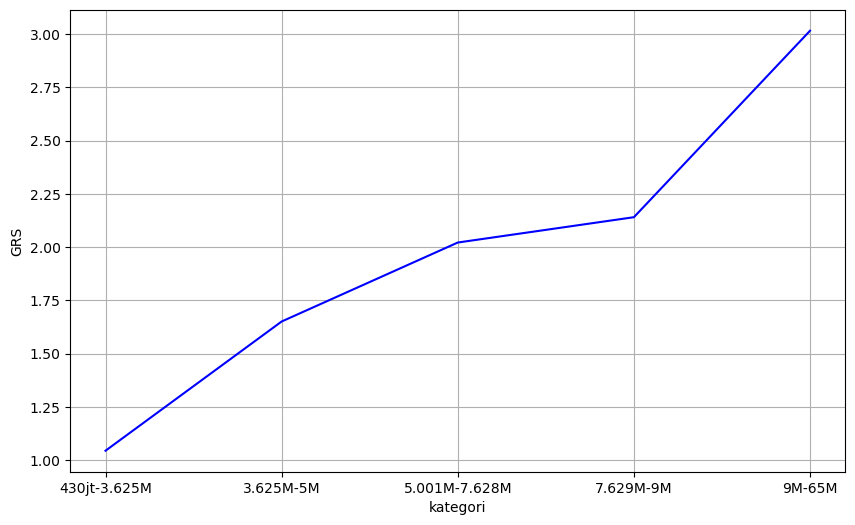

In [112]:
for i, col in enumerate(['LB','LT','KT','KM','GRS']):
    plt.figure(i)
    plt.figure(figsize=(10,6))
    plt.grid()
    sns.lineplot(mean_group[col],color="blue")